In [2]:
""" This notebook computes Figure 4 of the paper
(1) downloads optimal portfolio weights from the file portf_al02.txt
(2) evaluates their true utilities
(3) computes Figure 4 of the paper
"""

import pandas as pd
import numpy as np

In [3]:
# Importing NYSE_2 dataset
stocks=pd.read_csv('NYSE_2.csv')
print(stocks.shape)
stocks.head()

(11178, 19)


,ahp,alcoa,amerb,coke,dow,dupont,ford,ge,gm,hp,ibm,inger,jnj,kimbc,merck,mmm,morris,pandg,schlum
0,1.01515,1.02765,1.04183,1.00637,1.00847,1.01983,1.00000,1.00000,1.01026,1.01935,1.00429,1.01357,0.99683,1.05340,1.03148,1.03377,1.01495,1.00775,1.01176
1,1.01493,1.04036,0.98905,1.00475,1.00840,1.00833,1.00157,1.02187,0.99746,1.01266,0.99573,1.00446,1.00318,1.00461,1.00898,1.00251,1.00000,1.00192,1.01938
2,1.00000,0.97629,0.97786,0.98583,0.99722,0.99449,0.98116,0.97860,0.98219,0.98125,0.98571,0.99556,0.95873,0.98165,0.98043,0.95990,0.97218,0.98656,0.97338
3,1.02451,1.00662,1.02642,1.01917,0.99443,1.00693,1.02720,1.00795,0.98705,1.00637,1.01522,1.00000,1.01325,0.98131,1.01089,1.03655,0.99663,1.00778,1.00000
4,1.03100,0.98465,1.00368,1.00313,1.02801,1.00413,1.04361,1.00394,1.00525,1.03165,1.02427,1.01563,1.00654,1.02381,1.01077,0.99496,0.98649,1.01158,1.01563


In [4]:
# r: array for stock returns
N=stocks.shape[0]
d=stocks.shape[1]
r=np.zeros((N,d))
r=stocks.to_numpy()

In [5]:
# Correlation matrix of log-returns. For illustration only
stocks.apply(np.log).corr()

,ahp,alcoa,amerb,coke,dow,dupont,ford,ge,gm,hp,ibm,inger,jnj,kimbc,merck,mmm,morris,pandg,schlum
ahp,1.000000,0.219248,0.258873,0.339299,0.278589,0.289268,0.256957,0.358211,0.247053,0.235300,0.258679,0.236410,0.389621,0.256734,0.431491,0.316438,0.281480,0.332386,0.232661
alcoa,0.219248,1.000000,0.252616,0.260254,0.429980,0.407519,0.335487,0.378002,0.322186,0.279937,0.310897,0.362632,0.247533,0.252311,0.248300,0.355041,0.241392,0.235986,0.286158
amerb,0.258873,0.252616,1.000000,0.293947,0.282271,0.300477,0.265184,0.328497,0.258314,0.222257,0.239127,0.272025,0.269539,0.253189,0.243256,0.302461,0.342039,0.278571,0.217291
coke,0.339299,0.260254,0.293947,1.000000,0.350238,0.364651,0.303778,0.428572,0.309843,0.275344,0.312802,0.269633,0.394477,0.306578,0.354628,0.389088,0.337595,0.435788,0.266311
dow,0.278589,0.429980,0.282271,0.350238,1.000000,0.524389,0.372021,0.440892,0.380112,0.307291,0.341106,0.398528,0.310500,0.296633,0.299360,0.434690,0.283711,0.319442,0.306805
dupont,0.289268,0.407519,0.300477,0.364651,0.524389,1.000000,0.365317,0.451367,0.391179,0.309210,0.360262,0.375839,0.317372,0.305324,0.313979,0.452503,0.290921,0.347514,0.331467
ford,0.256957,0.335487,0.265184,0.303778,0.372021,0.365317,1.000000,0.421533,0.602715,0.312626,0.343989,0.329160,0.282144,0.245760,0.273349,0.344714,0.255478,0.271835,0.247349
ge,0.358211,0.378002,0.328497,0.428572,0.440892,0.451367,0.421533,1.000000,0.432960,0.387473,0.450930,0.380193,0.405883,0.322860,0.381286,0.457310,0.330034,0.393609,0.318113
gm,0.247053,0.322186,0.258314,0.309843,0.380112,0.391179,0.602715,0.432960,1.000000,0.317878,0.367804,0.337601,0.281715,0.254033,0.271263,0.367157,0.254641,0.278158,0.268061
hp,0.235300,0.279937,0.222257,0.275344,0.307291,0.309210,0.312626,0.387473,0.317878,1.000000,0.441579,0.279304,0.267325,0.197631,0.263892,0.334810,0.245171,0.246845,0.258109


In [6]:
# Evaluating the covariance matrix
cov=np.cov(np.log(r), rowvar=False)
for i in range(d):
    print(np.vectorize(round)(cov[i,0:d],6))

[2.58e-04 6.60e-05 6.00e-05 8.30e-05 7.50e-05 7.10e-05 7.60e-05 8.70e-05
 6.80e-05 8.60e-05 6.70e-05 6.80e-05 9.60e-05 6.40e-05 1.09e-04 7.40e-05
 7.70e-05 7.60e-05 7.20e-05]
[6.60e-05 3.46e-04 6.80e-05 7.40e-05 1.34e-04 1.16e-04 1.15e-04 1.07e-04
 1.03e-04 1.19e-04 9.30e-05 1.20e-04 7.10e-05 7.30e-05 7.30e-05 9.60e-05
 7.60e-05 6.30e-05 1.02e-04]
[6.00e-05 6.80e-05 2.11e-04 6.50e-05 6.90e-05 6.70e-05 7.10e-05 7.20e-05
 6.40e-05 7.40e-05 5.60e-05 7.10e-05 6.00e-05 5.70e-05 5.60e-05 6.40e-05
 8.40e-05 5.80e-05 6.10e-05]
[8.30e-05 7.40e-05 6.50e-05 2.35e-04 9.00e-05 8.60e-05 8.60e-05 9.90e-05
 8.10e-05 9.60e-05 7.70e-05 7.40e-05 9.30e-05 7.30e-05 8.60e-05 8.60e-05
 8.80e-05 9.50e-05 7.80e-05]
[7.50e-05 1.34e-04 6.90e-05 9.00e-05 2.80e-04 1.35e-04 1.15e-04 1.12e-04
 1.09e-04 1.17e-04 9.20e-05 1.19e-04 8.00e-05 7.70e-05 7.90e-05 1.05e-04
 8.10e-05 7.60e-05 9.80e-05]
[7.10e-05 1.16e-04 6.70e-05 8.60e-05 1.35e-04 2.35e-04 1.03e-04 1.05e-04
 1.03e-04 1.08e-04 8.90e-05 1.03e-04 7.50e-05 7.20e-

In [7]:
# Evaluating the expectation vector
mu=np.mean(np.log(r),axis=0)
for i in range(d):
    print(i,mu[i])

0 0.00047387072759585606
1 0.00034306595660099355
2 0.0005110836528094722
3 0.0005280394297623978
4 0.0004367927786456425
5 0.00032502495852828266
6 0.00035672142791947346
7 0.0004766729446252502
8 0.0002617048409259715
9 0.000548355527516207
10 0.0003653120960748834
11 0.0004130794529929951
12 0.0005933246550213262
13 0.00047998023510018777
14 0.0005460947794247216
15 0.0004085709396190517
16 0.0007299668768228506
17 0.0004784722559498487
18 0.0005572075755420875


In [8]:
def refine(w,tol=1/10**3):
    """ Drops small weights and normalizes the remaining ones """
    d=w.shape[0]
    opt_num=[i for i in range(d) if w[i]>tol]
    w=w[opt_num]/np.sum(w[opt_num])    
    return opt_num, w

In [9]:
def U(nu,r):
    """ Empirical utility, power (0<alpha<=1) or logarithmic (alpha=0) """
    if alpha==0:
        return np.mean(np.log(np.dot(r[0:N,:],nu)))
    else:
        return np.mean(np.dot(r[0:N,:],nu)**alpha)

In [10]:
# Downloading optimal portfolio weights from the file portf_al02.txt
g = open('portf_al02.txt')
portf_list=[]
for line in g:
    portf_list.append([float(x) for x in line.split()])
g.close()
nu_opt=np.asarray(portf_list)
n_realizations=150
# Printing optimal portolios. For illustration only 
for realization in range(n_realizations):
    opt_num, w =refine(nu_opt[realization,:])
    print(realization,opt_num, w)

0 [2, 3, 13, 14] [0.14132007 0.015437   0.36654635 0.47669658]
1 [3, 18] [0.29509148 0.70490852]
2 [6, 9, 16] [0.13167705 0.46449913 0.40382382]
3 [9, 13, 16] [0.13666655 0.37439222 0.48894123]
4 [16] [1.]
5 [3, 12, 16] [0.20734878 0.20035104 0.59230018]
6 [9] [1.]
7 [9, 16] [0.47333529 0.52666471]
8 [9, 16] [0.27555452 0.72444548]
9 [16, 18] [0.63819454 0.36180546]
10 [3, 9, 12, 17] [0.43673705 0.2755079  0.05816247 0.22959258]
11 [1, 13] [0.46236727 0.53763273]
12 [16, 18] [0.77511323 0.22488677]
13 [9] [1.]
14 [3, 4, 16] [0.17754442 0.2126404  0.60981518]
15 [9, 13, 16, 18] [0.38029723 0.2469012  0.10018911 0.27261246]
16 [9, 18] [0.3253739 0.6746261]
17 [16, 17] [0.5059364 0.4940636]
18 [7, 16] [0.44090729 0.55909271]
19 [16] [1.]
20 [12, 14, 16] [0.17208766 0.08601927 0.74189307]
21 [12] [1.]
22 [12, 16] [0.36456128 0.63543872]
23 [11, 12, 16] [0.15773755 0.07379143 0.76847102]
24 [16] [1.]
25 [14, 16] [0.69321892 0.30678108]
26 [16, 18] [0.79926001 0.20073999]
27 [16, 18] [0.5736

In [11]:
# Evaluation of true true utlity, using a long sample r_large
# U_opt is the array of evaluted true uilities of the optimal portolios
def U_true(nu,r):
    z=np.dot(r[0:N_large,:],nu) 
    if alpha==0:
        return np.mean(np.log(z))
    else:
        return np.mean(z**alpha)
alpha=0.2
U_opt=np.zeros(n_realizations)
N_large=10**7
r_large=np.zeros((N_large,d))
r_rel_large=np.zeros((N_large,d))
np.random.seed(42)
r_large=np.exp(np.random.multivariate_normal(mu,cov,N_large)) 
for t in range(N_large):
    r_rel_large[t,:]=r_large[t,:]/np.max(r_large[t,:])
for realization in range(n_realizations):
    opt_num, w = refine(nu_opt[realization,:])
    nu_opt[realization,:]=0
    nu_opt[realization,opt_num]=w
    U_opt[realization]=(U_true(nu_opt[realization,:],r_large)-1)*10**4

In [12]:
av_fractions=np.mean(nu_opt,axis=0) 

(array([ 1,  0,  1,  8, 19,  9, 14, 14, 21, 63], dtype=int64),
 array([0.97451671, 1.03011262, 1.08570853, 1.14130444, 1.19690034,
        1.25249625, 1.30809216, 1.36368807, 1.41928398, 1.47487988,
        1.53047579]))

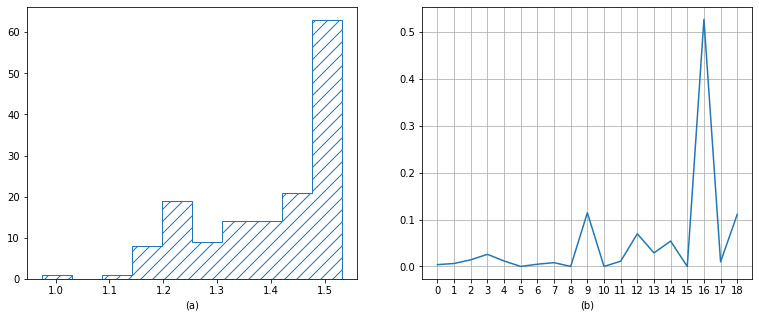

In [13]:
# Figure 5 of the paper
# (a) histogram of the (evaluated) true utility
# (b) average portfolio fractions over all optimal portfolios
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig, axes = plt.subplots(1, 2, figsize=(13,5))
axes[0].hist(U_opt,bins=10,histtype='step',hatch='//') 
axes[0].set_xlabel('(a)')
axes[1].plot(np.arange(0,d),av_fractions)
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axes[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.1))
axes[1].grid(which='major')
axes[1].set_xlabel('(b)')
fig.savefig('hist_2.png', dpi=400, bbox_inches='tight')
np.histogram(U_opt)

In [15]:
print(np.mean(U_opt),np.median(U_opt),np.percentile(U_opt,20),np.percentile(U_opt,10))

1.4000700321179802 1.4474600344760447 1.264202216727739 1.2246982127939177
